In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from BuysBallot import BuysBallotModel

In [2]:
path = "Data/ukcp09_gridded-land-obs-daily_timeseries_mean-temperature_000000E_500000N_19600101-20161231.csv"
data = pd.read_csv(path, header=[0,1], index_col=0)

In [3]:
data.head()

easting,22500,27500,32500,37500,42500,47500,27500,32500,37500,42500,...,37500,42500,47500,17500,22500,27500,32500,37500,42500,47500
northing,547500,547500,547500,547500,547500,547500,542500,542500,542500,542500,...,507500,507500,507500,502500,502500,502500,502500,502500,502500,502500
1960-01-01,6.20,6.40,6.94,7.14,7.15,7.23,5.87,6.01,6.46,6.67,...,6.44,6.22,6.62,6.11,7.09,7.00,6.74,6.73,6.74,6.84
1960-01-02,4.53,4.58,4.81,4.90,4.90,5.06,4.20,4.24,4.51,4.66,...,4.05,3.97,4.38,4.40,4.82,4.66,4.38,4.36,4.43,4.65
1960-01-03,8.48,8.51,8.72,8.70,8.49,8.39,8.18,8.12,8.29,8.23,...,8.75,8.44,8.67,8.96,9.58,9.43,9.09,8.97,8.87,8.90
1960-01-04,7.02,7.09,7.31,7.34,7.27,7.34,6.83,6.85,7.05,7.10,...,7.39,7.14,7.34,7.51,8.04,7.94,7.67,7.56,7.50,7.54
1960-01-05,2.49,2.74,3.31,3.49,3.52,3.59,2.40,2.57,2.95,3.12,...,4.02,3.54,3.59,2.94,4.20,4.26,4.09,3.97,3.81,3.63


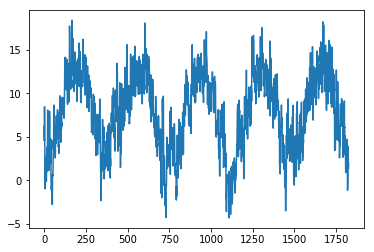

In [4]:
dates_to_remove = [str(y)+"-02-29" for y in range(1960, 2017, 4)]
data = data.drop(dates_to_remove)
series = data["22500"]["547500"]
sup = len(series)-1
inf = 0
dates = data.index
plt.plot(list(series[:365*5]))
plt.show()

In [5]:
def f2(t, i, j, length, subd = 1):
    return np.power(t,i) * (t>=j*length/subd).astype(int)*(t<(j+1)*length/subd).astype(int)


def g(t, i, k = 365):
    return (t%k == i).astype(int) - (t%k == 0).astype(int)

In [6]:
f2(np.arange(100),2,1,100,3)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [16]:
BBM = BuysBallotModel(f2, g, subd=1, dim=2)

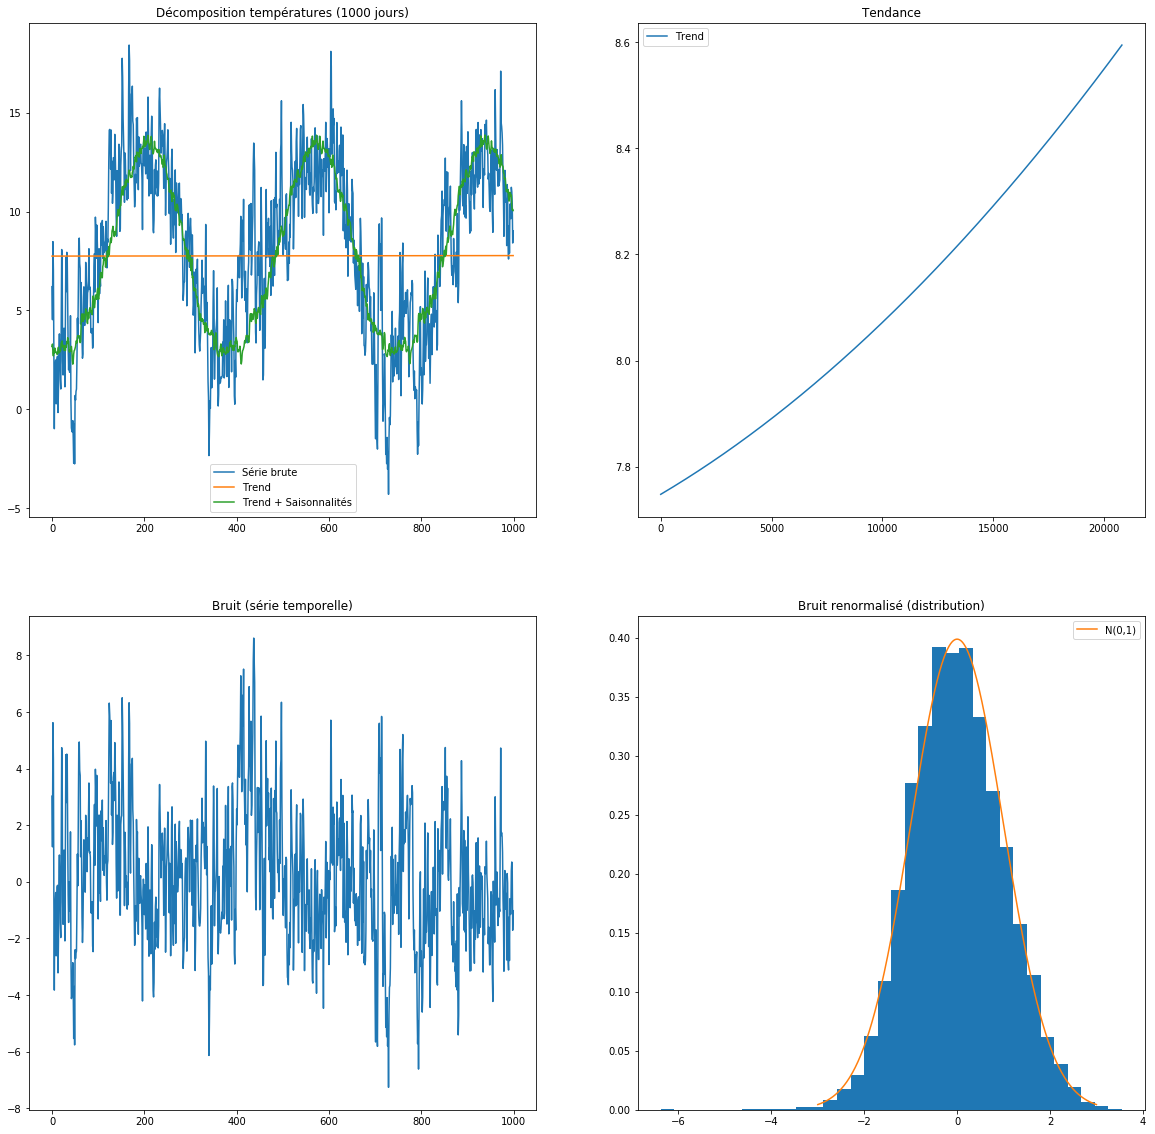

In [17]:
BBM.plot_decomposition(data,"22500", "547500")

In [19]:
BBM?

In [10]:
for col in data.columns:
    print(col)

('22500', '547500')
('27500', '547500')
('32500', '547500')
('37500', '547500')
('42500', '547500')
('47500', '547500')
('27500', '542500')
('32500', '542500')
('37500', '542500')
('42500', '542500')
('47500', '542500')
('27500', '537500')
('32500', '537500')
('37500', '537500')
('42500', '537500')
('47500', '537500')
('12500', '532500')
('17500', '532500')
('22500', '532500')
('27500', '532500')
('32500', '532500')
('37500', '532500')
('42500', '532500')
('47500', '532500')
('2500', '527500')
('7500', '527500')
('12500', '527500')
('17500', '527500')
('22500', '527500')
('27500', '527500')
('32500', '527500')
('37500', '527500')
('42500', '527500')
('47500', '527500')
('2500', '522500')
('7500', '522500')
('12500', '522500')
('17500', '522500')
('22500', '522500')
('27500', '522500')
('32500', '522500')
('37500', '522500')
('42500', '522500')
('47500', '522500')
('7500', '517500')
('12500', '517500')
('17500', '517500')
('22500', '517500')
('27500', '517500')
('32500', '517500')
('375